# Perceptron

A perceptron is a fundamental building block of artificial neural networks. It is a simple, single-layer artificial neuron that takes one or more inputs, applies a weighted sum of the inputs, and then applies a threshold to the result. This threshold determines whether the perceptron fires an output of 1 or 0.

## Dependencies

In [181]:
import numpy as np
import matplotlib.pyplot as plt

## Generate Datasets

Generating linearly separable datasets and label them

In [182]:
num_points = 50  # Number of points to generate
num_features = 2  # Number of features for each point (e.g., x and y coordinates)

# Create two classes with distinct means and variances
class_means = [[-0.5, -0.5], [2.5, 2.5]]  # Means for classes 1 and 2
class_stds = [[0.7, 0.5], [1.5, 1.0]]  # Standard deviations for classes 1 and 2

# Generate points for each class
y1 = np.random.normal(loc=class_means[0], scale=class_stds[0], size=(num_points // 2, num_features))
y2 = np.random.normal(loc=class_means[1], scale=class_stds[1], size=(num_points // 2, num_features))

# Concatenating both classes
points = np.concatenate([y1, y2])

# Create labels for class 1
labels_1 = np.ones((num_points // 2), dtype=int)

# Create labels for class 2
labels_2 = np.zeros((num_points // 2), dtype=int)

# Combine labels for both classes
labels = np.concatenate((labels_1, labels_2))

# Defining Core Functions

In [183]:
def drawLine(weight, bias):
    """
    Draws a linear line based on the given weight and bias parameters.

    Args:
        weight (float): Represents the slope of the line.
        bias (float): Represents the y-intercept.

    Returns:
        None
    """
    r = range(-2, 5)
    points = []
    for x in r:
        points.append([x, lineeEuation(x, weight, bias)])
    points = np.array(points)
    plt.plot(points[:, 0], points[:, 1])

def lineeEuation(x, weight, bias):
    """
    Calculates the linear equation value for the given input x.

    Args:
        weight (float): Represents the slope of the line.
        bias (float): Represents the y-intercept.

    Returns:
        float: The predicted value for the given input x.
    """
    return weight * x + bias

def classify(x, weight, bias):
    """
    Performs classification using the linear equation and the given weight and bias.

    Args:
        x (float): Input data point.
        weight (float): Represents the slope of the line.
        bias (float): Represents the y-intercept.

    Returns:
        int: The predicted class label (0 or 1).
    """
    y = weight * x + bias
    if y > 0:
        return 1
    else:
        return 0

def error(y, pred):
    """
    Calculates the error between the actual and predicted values.

    Args:
        y (float): Actual value.
        pred (float): Predicted value.

    Returns:
        float: The difference between the actual and predicted values.
    """
    return y - pred

def fixedIncrement(x, r, weight, bias, c):
    """
    Updates the weights and biases using the fixed-increment learning rule.

    Args:
        x (float): Input data point.
        r (int): Target class label.
        weight (float): Represents the slope of the line.
        bias (float): Represents the y-intercept.
        c (float): Learning rate.

    Returns:
        list: A list containing the updated weights and biases.
    """
    pred = lineeEuation(x, weight, bias)
    p = classify(x, weight, bias)
    if p == r:
        return [weight, bias]
    else:
        if p <= 0:
            return [weight + c * pred, bias]
        else:
            return [weight - c * pred, bias]

def train(points, labels, w , b, alpha, optimizer = fixedIncrement):
    """
    Trains the perceptron model using the given training data and learning rate.

    Args:
        points (list): List of data points with (x, y) pairs.
        labels (list): List of corresponding labels (0 or 1).
        w (float): Initial weight.
        b (float): Initial bias.
        alpha (float): Learning rate.
        optimizer (function): Function used to update weights and biases.

    Returns:
        list: A list containing the final weights, biases, and mean error.
    """
    
    nw = w
    nb = b
    meanE = 0
    for i, p in enumerate(points):
        meanE += error(labels[i], lineeEuation(p[0], nw, nb))
        nw, nb = optimizer(p[0], labels[i], nw, nb, alpha)
    return nw, nb, meanE / len(points)


# Plot The Initial State

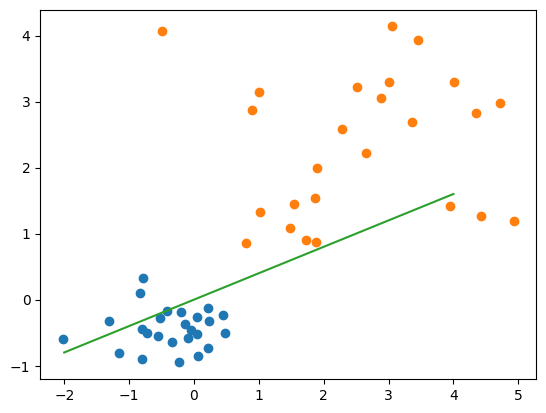

In [184]:
w = 0.4
b = 0
t = 0

plt.plot(y1[:, 0], y1[:, 1], 'o')
plt.plot(y2[:, 0], y2[:, 1], 'o')
line = drawLine(w, b)


# Training

Train and calculate mean loss

#### Using Fixed-Increment

The fixed-increment learning rule is a simple and widely used algorithm for training perceptrons, which are a type of artificial neural network that can classify data into two categories. The rule adjusts the weights and biases of the perceptron model in a direction that minimizes the error of the model's predictions.

Key steps:
1. Predict the class label for a given input data point.
2. Calculate the error by comparing the predicted class label to the actual class label.
3. Adjust the weights and biases by multiplying the error by a constant factor (learning rate) and adding the result to the weights and biases.
4. Repeat the process for each data point in the training set.

Advantages: 
- Simple
- Efficient for small datasets
- Versatile with various activation functions

Disadvantages:
- Inefficient for large datasets
- May not converge for all problems
- Sensitive to learning rate

Overall:

Simple and effective for small to medium-sized datasets, good for low-accuracy tasks with manageable datasets

[ i ] Mean Error 0.6037074024078045


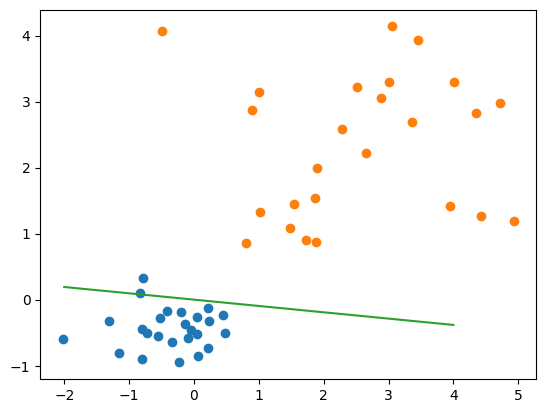

In [185]:

epoch = 1 # Number of training epochs
MeanError = 0 # Initialize mean error to 0

for i in range(epoch):
    # Train the perceptron model for one epoch
    w , b, MeanError = train(points, labels, w, b, 1)

print(f"[ i ] Mean Error {MeanError}")
plt.plot(y1[:, 0], y1[:, 1], 'o')
plt.plot(y2[:, 0], y2[:, 1], 'o')
line = drawLine(w, b)

plt.show()

# Test

Test our model with new input

In [186]:
#Given a data point x = 2, classify it using the trained perceptron model
print(classify(2, w, b))

0
